# Рубежный контроль №1
## Технологии разведочного аналища и обработки данных
### Вариант 19, Задача №3, датасет 3 (marvel-wikia-data.csv)

#### Загрузка и анализ структуры набора данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style = 'ticks')

data = pd.read_csv('../datasets/marvel-wikia-data.csv')

In [2]:
data.shape

(16376, 13)

In [3]:
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
Year                float64
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           16376 non-null  int64  
 1   name              16376 non-null  object 
 2   urlslug           16376 non-null  object 
 3   ID                12606 non-null  object 
 4   ALIGN             13564 non-null  object 
 5   EYE               6609 non-null   object 
 6   HAIR              12112 non-null  object 
 7   SEX               15522 non-null  object 
 8   GSM               90 non-null     object 
 9   ALIVE             16373 non-null  object 
 10  APPEARANCES       15280 non-null  float64
 11  FIRST APPEARANCE  15561 non-null  object 
 12  Year              15561 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.6+ MB


In [5]:
data.isnull().sum()

page_id                 0
name                    0
urlslug                 0
ID                   3770
ALIGN                2812
EYE                  9767
HAIR                 4264
SEX                   854
GSM                 16286
ALIVE                   3
APPEARANCES          1096
FIRST APPEARANCE      815
Year                  815
dtype: int64

In [6]:
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


#### Проведем масштабирование колонки 'Appearances' - количество появления персонажа.
Для масштабирования применим метод MinMax.

In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['APPEARANCES']])

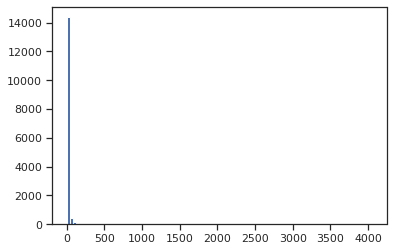

In [8]:
plt.hist(data['APPEARANCES'], 100)
plt.show()

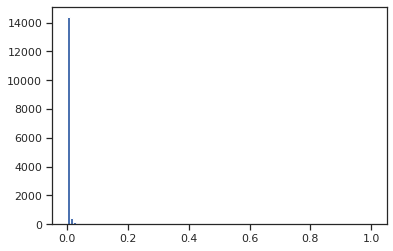

In [9]:
plt.hist(sc1_data, 100)
plt.show()

#### Выполним преобразование категориальных признаков в количественные

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

Возьмем колонку EYE для преобразования. Для этой колонки подойдет Label Encoding, т.к. в ней отсутствует порядок

In [11]:
cat_data = data[['EYE']]
cat_data.head()

,EYE
0,Hazel Eyes
1,Blue Eyes
2,Blue Eyes
3,Blue Eyes
4,Blue Eyes


In [12]:
cat_data['EYE'].unique()

array(['Hazel Eyes', 'Blue Eyes', 'Brown Eyes', 'Green Eyes', 'Grey Eyes',
       'Yellow Eyes', 'Gold Eyes', 'Red Eyes', 'Black Eyeballs',
       'Amber Eyes', 'Variable Eyes', nan, 'Black Eyes', 'White Eyes',
       'Orange Eyes', 'Silver Eyes', 'Purple Eyes', 'Pink Eyes',
       'One Eye', 'Violet Eyes', 'Multiple Eyes', 'Magenta Eyes',
       'Yellow Eyeballs', 'No Eyes', 'Compound Eyes'], dtype=object)

In [13]:
from sklearn.impute import SimpleImputer, MissingIndicator

imp1 = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data_imp1 = imp1.fit_transform(cat_data)
data_imp1

array([['Hazel Eyes'],
       ['Blue Eyes'],
       ['Blue Eyes'],
       ...,
       ['Black Eyes'],
       ['Blue Eyes'],
       ['Blue Eyes']], dtype=object)

In [14]:
cat_enc = pd.DataFrame({'neye':data_imp1.T[0]})
le = LabelEncoder()
le_data = le.fit_transform(cat_enc['neye'])
le.classes_

array(['Amber Eyes', 'Black Eyeballs', 'Black Eyes', 'Blue Eyes',
       'Brown Eyes', 'Compound Eyes', 'Gold Eyes', 'Green Eyes',
       'Grey Eyes', 'Hazel Eyes', 'Magenta Eyes', 'Multiple Eyes',
       'No Eyes', 'One Eye', 'Orange Eyes', 'Pink Eyes', 'Purple Eyes',
       'Red Eyes', 'Silver Eyes', 'Variable Eyes', 'Violet Eyes',
       'White Eyes', 'Yellow Eyeballs', 'Yellow Eyes'], dtype=object)

In [15]:
le_data

array([9, 3, 3, ..., 2, 3, 3])

In [16]:
np.unique(le_data)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [17]:
le.inverse_transform([i for i in range(0, 24)])

array(['Amber Eyes', 'Black Eyeballs', 'Black Eyes', 'Blue Eyes',
       'Brown Eyes', 'Compound Eyes', 'Gold Eyes', 'Green Eyes',
       'Grey Eyes', 'Hazel Eyes', 'Magenta Eyes', 'Multiple Eyes',
       'No Eyes', 'One Eye', 'Orange Eyes', 'Pink Eyes', 'Purple Eyes',
       'Red Eyes', 'Silver Eyes', 'Variable Eyes', 'Violet Eyes',
       'White Eyes', 'Yellow Eyeballs', 'Yellow Eyes'], dtype=object)

Для преобразования колонки 'SEX' воспользуемся методом one hot encoding:

In [18]:
cat_data = data[['SEX']]
cat_data['SEX'].unique()

array(['Male Characters', 'Female Characters', 'Genderfluid Characters',
       'Agender Characters', nan], dtype=object)

In [19]:
# Импьютация наиболее часто встречающимися значениями
imp = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data_imp = imp.fit_transform(cat_data)
data_imp

array([['Male Characters'],
       ['Male Characters'],
       ['Male Characters'],
       ...,
       ['Male Characters'],
       ['Male Characters'],
       ['Male Characters']], dtype=object)

In [20]:
cat_enc = pd.DataFrame({'nsex':data_imp.T[0]})
cat_enc

,nsex
0,Male Characters
1,Male Characters
2,Male Characters
3,Male Characters
4,Male Characters
...,...
16371,Male Characters
16372,Male Characters
16373,Male Characters
16374,Male Characters


In [21]:
pd.get_dummies(cat_enc).head()

,nsex_Agender Characters,nsex_Female Characters,nsex_Genderfluid Characters,nsex_Male Characters
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [22]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['nsex']])
cat_enc_ohe

<16376x4 sparse matrix of type '<class 'numpy.float64'>'
	with 16376 stored elements in Compressed Sparse Row format>

In [23]:
cat_enc_ohe.todense()[100:110]

matrix([[0., 0., 0., 1.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]])

#### Построим график Jointplot
График будем строить для колонок 'SEX' (пол) и 'HAIR' (цвет волос)

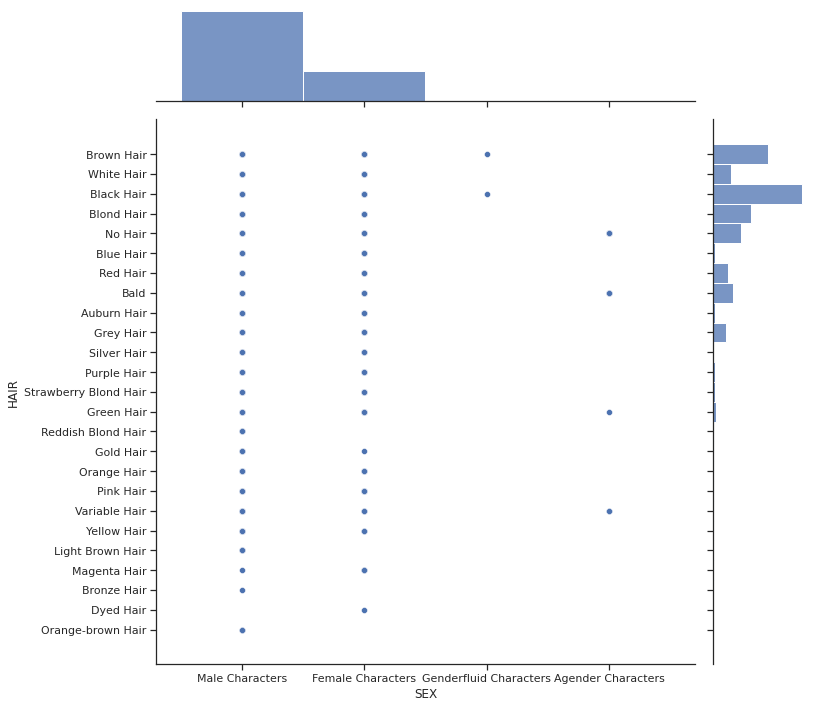

In [24]:
sns.jointplot(x = 'SEX', height = 10, y = 'HAIR', data = data)